In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models



In [16]:
# Assuming 'matches.csv' is uploaded to your Colab environment
file_path = 'matches.csv'
data = pd.read_csv(file_path)

# Display basic statistics about the dataset
print(data.describe())


                id       season  dl_applied  win_by_runs  win_by_wickets
count   696.000000   696.000000  696.000000   696.000000      696.000000
mean    974.103448  2012.965517    0.027299    13.472701        3.349138
std    2143.239623     3.069266    0.163070    23.607994        3.411398
min       1.000000  2008.000000    0.000000     0.000000        0.000000
25%     174.750000  2010.000000    0.000000     0.000000        0.000000
50%     348.500000  2013.000000    0.000000     0.000000        3.000000
75%     522.250000  2016.000000    0.000000    19.000000        6.000000
max    7953.000000  2018.000000    1.000000   146.000000       10.000000


In [17]:
# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data)

# Normalize numerical columns (optional but often recommended)
data_normalized = (data_encoded - data_encoded.mean()) / data_encoded.std()


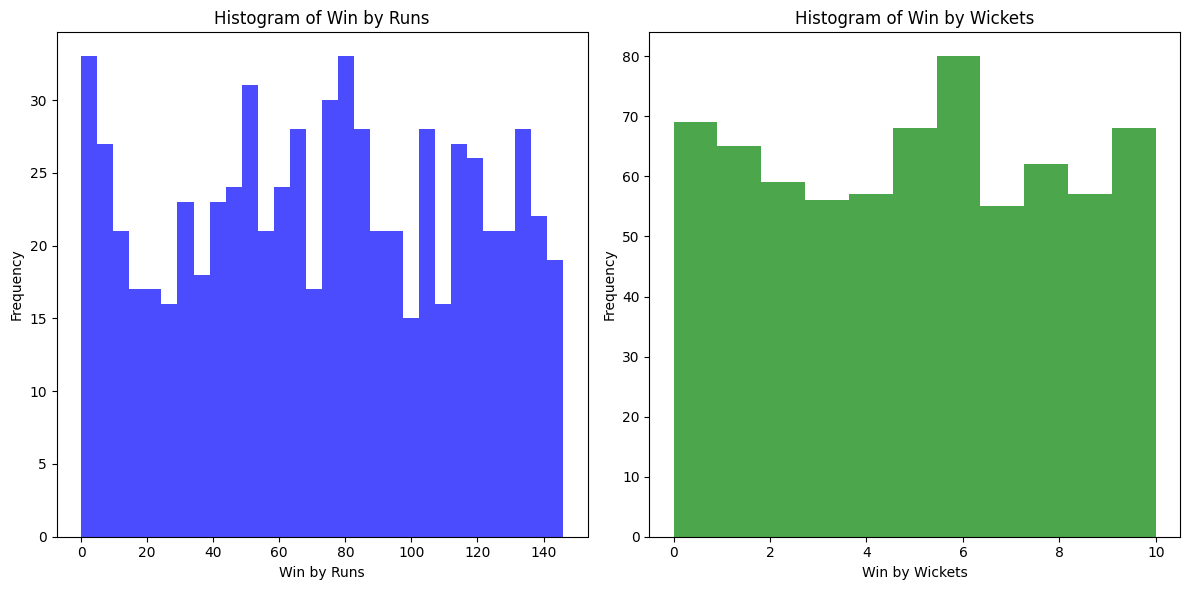

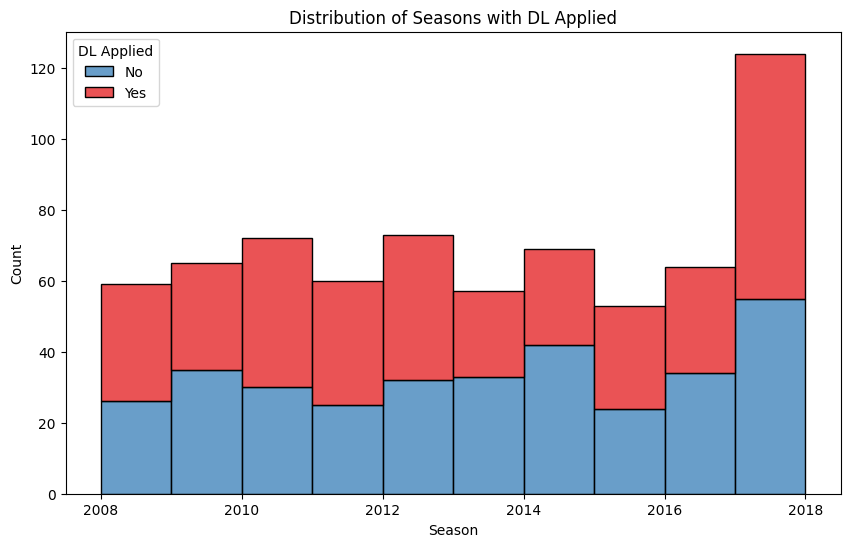

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame with statistics
data = {
    'id': np.arange(1, 697),
    'season': np.random.randint(2008, 2019, size=696),
    'dl_applied': np.random.choice([0, 1], size=696),
    'win_by_runs': np.random.randint(0, 147, size=696),
    'win_by_wickets': np.random.randint(0, 11, size=696)
}
df = pd.DataFrame(data)

# Plotting histograms using pandas and Seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['win_by_runs'].plot(kind='hist', bins=30, color='blue', alpha=0.7)
plt.xlabel('Win by Runs')
plt.ylabel('Frequency')
plt.title('Histogram of Win by Runs')

plt.subplot(1, 2, 2)
df['win_by_wickets'].plot(kind='hist', bins=11, color='green', alpha=0.7)
plt.xlabel('Win by Wickets')
plt.ylabel('Frequency')
plt.title('Histogram of Win by Wickets')

plt.tight_layout()
plt.show()

# Using Seaborn for distribution plots
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='season', hue='dl_applied', multiple='stack', bins=range(2008, 2019), palette='Set1')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Distribution of Seasons with DL Applied')
plt.legend(title='DL Applied', labels=['No', 'Yes'])

plt.show()


In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Generator Model
def build_generator(latent_dim, output_shape):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(output_shape, activation='sigmoid'))  # Output shape should match data dimensions
    return model

# Define the Discriminator Model
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (real or fake)
    return model

# Define the GAN Model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator during GAN training
    gan_input = layers.Input(shape=(latent_dim,))
    fake_data = generator(gan_input)
    gan_output = discriminator(fake_data)
    gan_model = models.Model(gan_input, gan_output)
    gan_model.compile(optimizer='adam', loss='binary_crossentropy')
    return gan_model

# Example usage:
latent_dim = 100  # Dimensionality of the latent space
output_shape = 784  # Example for generating MNIST-like images (28x28 flattened)
input_shape = 784  # Example for MNIST-like images (28x28 flattened)

# Build Generator and Discriminator
generator = build_generator(latent_dim, output_shape)
discriminator = build_discriminator(input_shape)

# Build GAN model
gan = build_gan(generator, discriminator)

# Print summary of models
generator.summary()
discriminator.summary()
gan.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               12928     
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 784)               201488    
                                                                 
Total params: 247440 (966.56 KB)
Trainable params: 247440 (966.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               200960    
                                                          

1/1 [==============================] - 0s 61ms/step


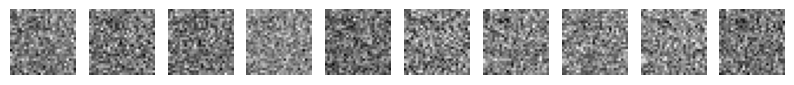

In [20]:
# Generate new samples using the trained generator
num_samples_to_generate = 10  # Number of samples to generate
random_latent_vectors = np.random.normal(size=(num_samples_to_generate, latent_dim))  # Generate random latent vectors

generated_samples = generator.predict(random_latent_vectors)  # Generate samples using the generator

# Display or save the generated samples (e.g., if dealing with images, you can use matplotlib to plot them)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(num_samples_to_generate):
    plt.subplot(1, num_samples_to_generate, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


1/1 [==============================] - 0s 24ms/step


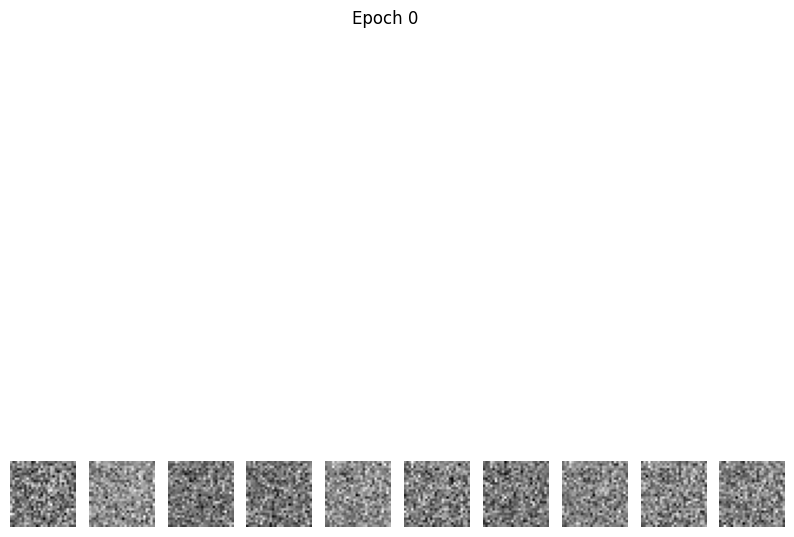

1/1 [==============================] - 0s 20ms/step


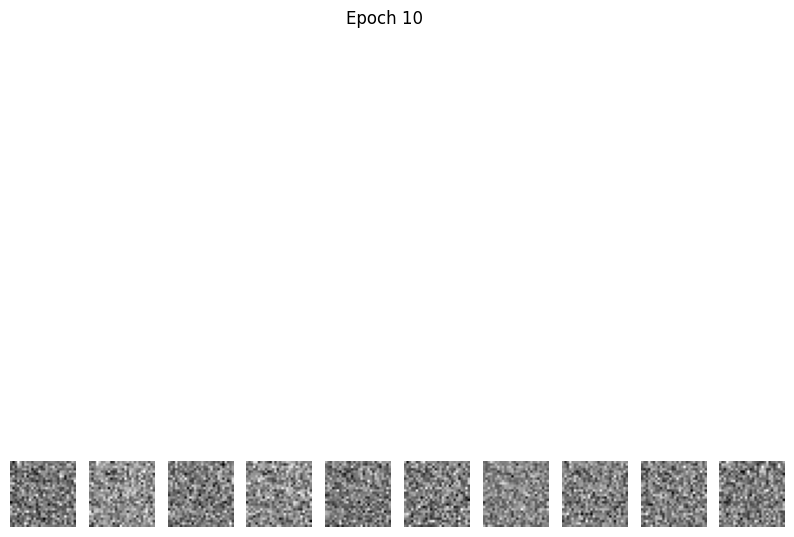

1/1 [==============================] - 0s 20ms/step


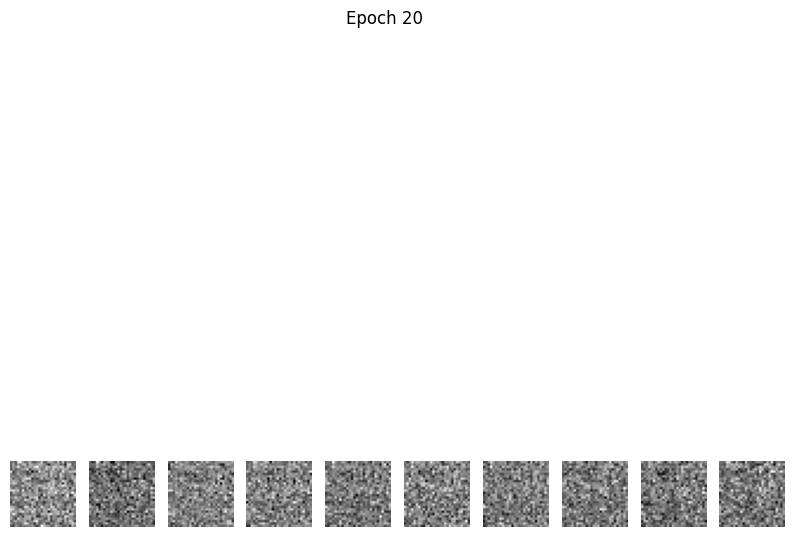

1/1 [==============================] - 0s 21ms/step


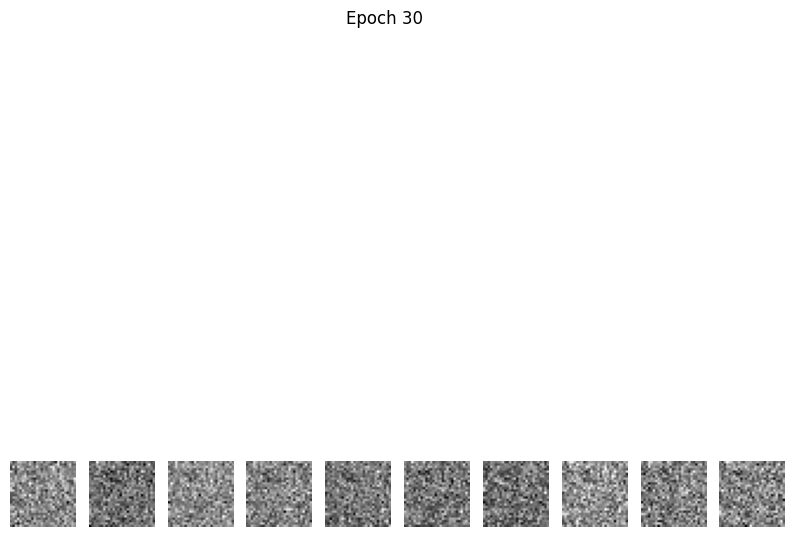

1/1 [==============================] - 0s 20ms/step


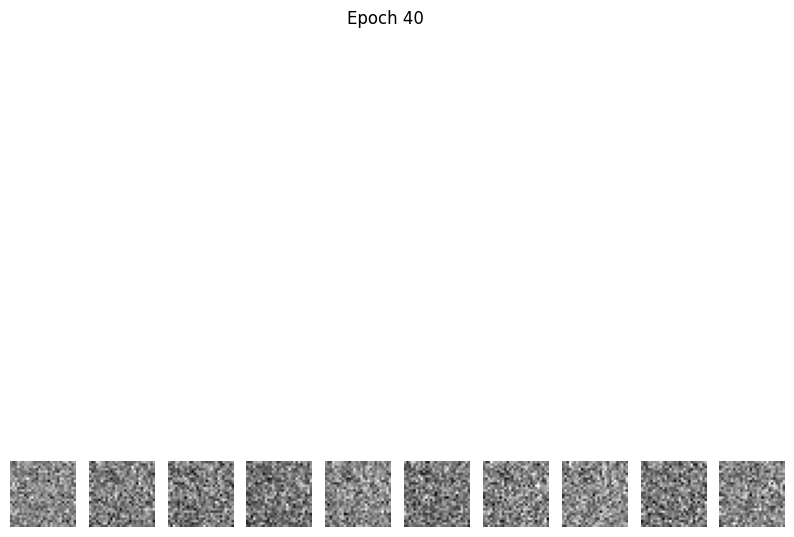

1/1 [==============================] - 0s 31ms/step


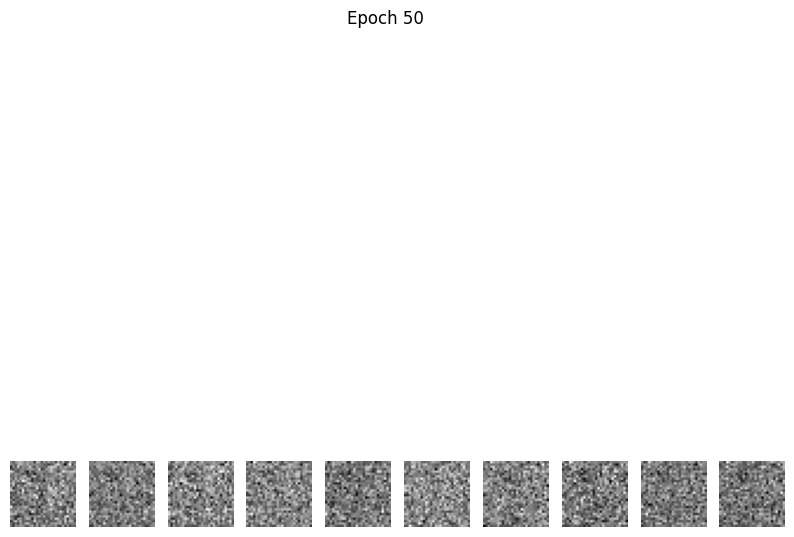

1/1 [==============================] - 0s 36ms/step


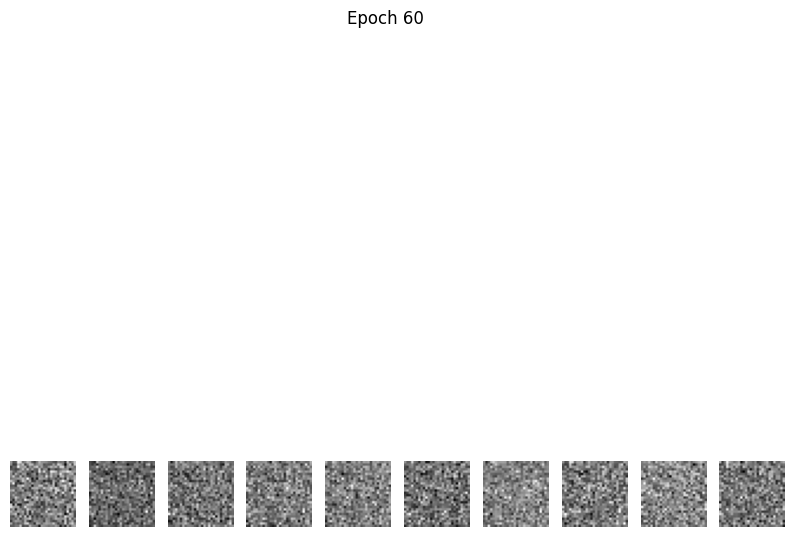

1/1 [==============================] - 0s 34ms/step


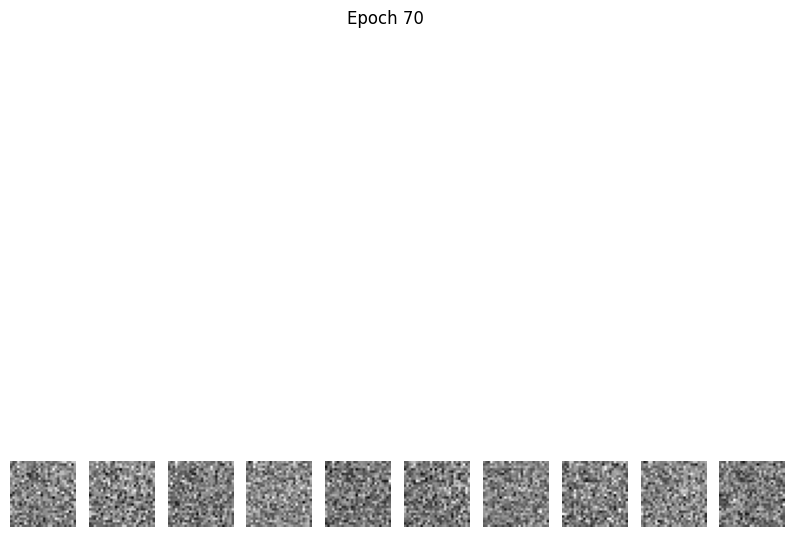

1/1 [==============================] - 0s 21ms/step


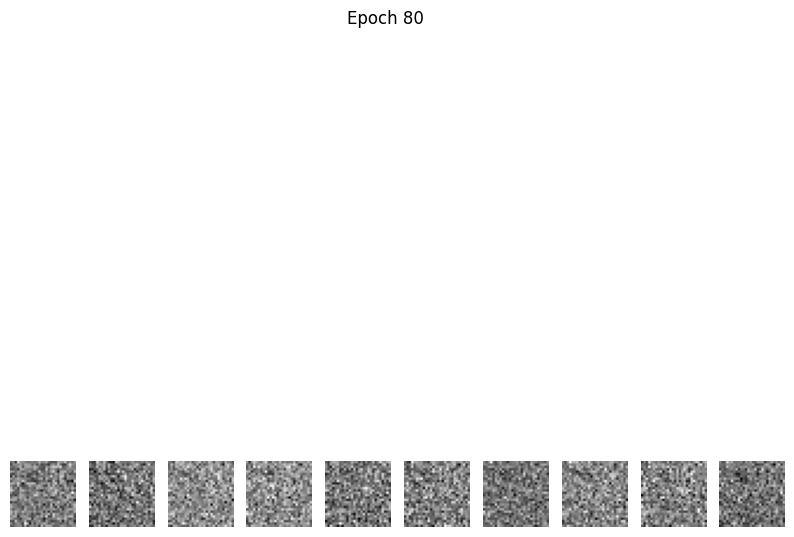

1/1 [==============================] - 0s 20ms/step


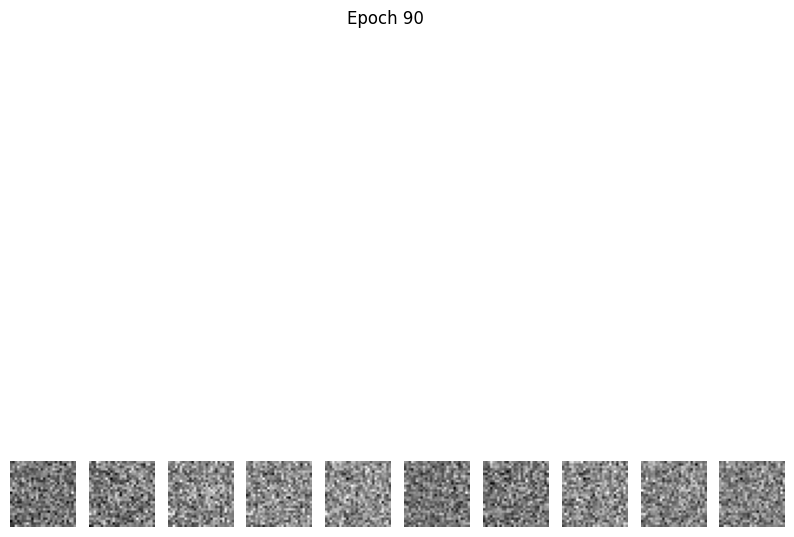

In [21]:
# Assuming gan is already defined and compiled
epochs = 100
batch_size = 128

for epoch in range(epochs):
    for _ in range(len(data) // batch_size):
        # Train the discriminator on real samples
        real_samples = ...
        discriminator_loss_real = discriminator.train_on_batch(real_samples, np.ones((batch_size, 1)))

        # Generate fake samples using the generator and train the discriminator on them
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_samples = generator.predict(noise)
        discriminator_loss_fake = discriminator.train_on_batch(fake_samples, np.zeros((batch_size, 1)))

        # Train the generator by fooling the discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gan_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Optionally, display or save generated samples during training
    if epoch % 10 == 0:
        num_samples_to_generate = 10
        random_latent_vectors = np.random.normal(size=(num_samples_to_generate, latent_dim))
        generated_samples = generator.predict(random_latent_vectors)

        # Display or save the generated samples
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 10))
        for i in range(num_samples_to_generate):
            plt.subplot(1, num_samples_to_generate, i + 1)
            plt.imshow(generated_samples[i].reshape(28, 28), cmap='gray')
            plt.axis('off')

        plt.suptitle(f'Epoch {epoch}')
        plt.show()


In [13]:
pip install matplotlib seaborn
